## **О наборе данных (About Dataset)**

**Источник:** https://www.kaggle.com/datasets/ahmeduzaki/egypt-redsea-earthquake-dataset-1955-2024

### **Описание (Description)**

Этот комплексный датасет содержит сейсмологические данные по землетрясениям за период с 1955 по 2024 год. Набор данных объединяет инструментальные наблюдения с расширенными инженерно-сейсмологическими параметрами, что делает его ценным ресурсом для исследований сейсмической опасности.


**Столбцы (Columns):**

* **time**  - Text   -   Временная метка в UTC
* **latitude**      -          Float   -  Географическая широта эпицентра (°N)
* **longitude**      -         Float   -  Географическая долгота эпицентра (°E)
* **depth**           -        Float   -  Глубина очага (км)
* **rms**            -         Float   -  Погрешность местоположения
* **mag_Mw**          -        Integer -  Унифицированая моментная магнитуда 
* **mag_category_3classes**  - Integer -  Категория магнитуды
* **depth_category_3classes** -Integer -  Категория глубины
* **days_since_last_event**  - Integer -  Дней с предыдущего землетрясения
* **events_last_30_days**   -  Integer -  Количество событий за последние 30 дней
* **events_last_90_days**   -  Integer -  Количество событий за последние 90 дней
* **avg_mag_last_30_days**  -  Float  -   Средняя магнитуда за 30 дней
* **avg_mag_last_90_days**  -  Float   -  Средняя магнитуда за 90 дней
* **max_mag_last_30_days**  -  Float  -   Максимальная магнитуда за 30 дней
* **max_mag_last_90_days**  -  Float   -  Максимальная магнитуда за 90 дней
* **distance_from_cairo_km** -  Float  -   Расстояние от эпицентра до Каира (км)

**Потенциальные области применения (Potential Use Cases):**

*   Прогнозирование магнитуд будущих событий
*   Моделирование seismic sequences и афтершоковых процессов
*   Анализ пространственно-временных кластеров сейсмичности

## **Ход работы**

### **Импорт библиотек и загрузка датасета**

In [6]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install kagglehub
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [67]:
from itertools import combinations
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [69]:
path = "egypt-redsea-earthquake-dataset-1955-2024.csv"
df = pd.read_csv(path)

In [71]:
df.head()

,time,latitude,longitude,depth,rms,mag_Mw,days_since_last_event,events_last_30_days,events_last_90_days,avg_mag_last_30_days,avg_mag_last_90_days,max_mag_last_30_days,max_mag_last_90_days,distance_from_cairo_km,mag_category_3classes,depth_category_3classes
0,1955-11-12 05:32:18.020000+00:00,25.119,34.506,15.0,0.89,5.730,0,1,1,5.730000,5.730000,5.73,5.73,635.386813,2,1
1,1956-12-18 17:53:06.180000+00:00,31.522,35.487,15.0,0.89,5.670,402,2,2,5.700000,5.700000,5.73,5.73,438.053224,2,1
2,1969-04-14 13:43:56.580000+00:00,27.343,33.665,15.0,0.89,5.190,14,4,4,5.797500,5.797500,6.60,6.60,382.563572,2,1
3,1973-03-05 23:59:46.600000+00:00,27.686,33.644,25.0,0.89,4.855,250,6,6,5.548333,5.548333,6.60,6.60,351.786522,2,1
4,1974-04-29 20:04:39.700000+00:00,30.529,31.721,33.0,0.89,5.195,419,7,7,5.455714,5.455714,6.60,6.60,71.238408,2,2


In [72]:
df.describe()

,latitude,longitude,depth,rms,mag_Mw,days_since_last_event,events_last_30_days,events_last_90_days,avg_mag_last_30_days,avg_mag_last_90_days,max_mag_last_30_days,max_mag_last_90_days,distance_from_cairo_km,mag_category_3classes,depth_category_3classes
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,28.849635,34.126164,11.139850,0.847158,4.042549,33.916667,29.271368,82.155983,3.950481,3.982761,5.296496,6.066581,347.755982,1.089744,0.153846
std,1.199016,1.478500,4.683406,0.357217,0.865687,74.309494,3.604820,19.755010,0.596808,0.515329,0.839514,0.774156,114.676833,0.755041,0.416273
min,23.006800,24.552500,1.000000,0.000000,1.851000,0.000000,1.000000,1.000000,2.550000,2.878889,3.600000,4.600000,6.268988,0.000000,0.000000
25%,28.509750,34.045500,10.000000,0.600000,3.550000,0.000000,30.000000,90.000000,3.721667,3.831944,4.700000,5.500000,345.255182,1.000000,0.000000
50%,28.811500,34.663000,10.000000,0.890000,4.140000,3.000000,30.000000,90.000000,4.045000,4.043889,5.300000,6.100000,367.018135,1.000000,0.000000
75%,29.218750,34.855750,10.000000,1.100000,4.685000,33.250000,30.000000,90.000000,4.293333,4.181389,5.730000,6.600000,388.266299,2.000000,0.000000
max,31.997000,35.936000,35.000000,1.700000,7.200000,599.000000,30.000000,90.000000,5.797500,5.797500,7.200000,7.200000,822.782093,2.000000,2.000000


### **Добавление нового атрибута**


Новый атрибут - **`log_seismic_energy`** = 1.5 × `Mw`  - `Сейсмическая энергия(Дж)`


In [74]:
df['log_seismic_energy'] = 1.5 * df['mag_Mw']

In [75]:
df.head()

,time,latitude,longitude,depth,rms,mag_Mw,days_since_last_event,events_last_30_days,events_last_90_days,avg_mag_last_30_days,avg_mag_last_90_days,max_mag_last_30_days,max_mag_last_90_days,distance_from_cairo_km,mag_category_3classes,depth_category_3classes,log_seismic_energy
0,1955-11-12 05:32:18.020000+00:00,25.119,34.506,15.0,0.89,5.730,0,1,1,5.730000,5.730000,5.73,5.73,635.386813,2,1,8.5950
1,1956-12-18 17:53:06.180000+00:00,31.522,35.487,15.0,0.89,5.670,402,2,2,5.700000,5.700000,5.73,5.73,438.053224,2,1,8.5050
2,1969-04-14 13:43:56.580000+00:00,27.343,33.665,15.0,0.89,5.190,14,4,4,5.797500,5.797500,6.60,6.60,382.563572,2,1,7.7850
3,1973-03-05 23:59:46.600000+00:00,27.686,33.644,25.0,0.89,4.855,250,6,6,5.548333,5.548333,6.60,6.60,351.786522,2,1,7.2825
4,1974-04-29 20:04:39.700000+00:00,30.529,31.721,33.0,0.89,5.195,419,7,7,5.455714,5.455714,6.60,6.60,71.238408,2,2,7.7925


### **Очистка данных**

Удаление выбросов и дублей, обработка пропущенных значений

In [76]:
print("Пропущенные значения в каждом столбце:")
print(df.isnull().sum())
print("\nОбщее количество пропущенных значений:", df.isnull().sum().sum())

Пропущенные значения в каждом столбце:
time                       0
latitude                   0
longitude                  0
depth                      0
rms                        0
mag_Mw                     0
days_since_last_event      0
events_last_30_days        0
events_last_90_days        0
avg_mag_last_30_days       0
avg_mag_last_90_days       0
max_mag_last_30_days       0
max_mag_last_90_days       0
distance_from_cairo_km     0
mag_category_3classes      0
depth_category_3classes    0
log_seismic_energy         0
dtype: int64

Общее количество пропущенных значений: 0


In [77]:
duplicates = df.duplicated().sum()
print(f"\nНайдено дубликатов: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Удалено {duplicates} дубликатов")


Найдено дубликатов: 0


In [78]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Столбец {column}: найдено {len(outliers)} выбросов")
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

numeric_columns = ['latitude', 'longitude', 'depth', 'rms', 'mag_Mw',
       'days_since_last_event', 'events_last_30_days', 'events_last_90_days',
       'avg_mag_last_30_days', 'avg_mag_last_90_days', 'max_mag_last_30_days',
       'max_mag_last_90_days', 'distance_from_cairo_km',
       'mag_category_3classes', 'depth_category_3classes']

for col in numeric_columns:
    print(col)
    df = handle_outliers_iqr(df, col)

latitude
Столбец latitude: найдено 90 выбросов
longitude
Столбец longitude: найдено 69 выбросов
depth
Столбец depth: найдено 85 выбросов
rms
Столбец rms: найдено 0 выбросов
mag_Mw
Столбец mag_Mw: найдено 1 выбросов
days_since_last_event
Столбец days_since_last_event: найдено 57 выбросов
events_last_30_days
Столбец events_last_30_days: найдено 25 выбросов
events_last_90_days
Столбец events_last_90_days: найдено 85 выбросов
avg_mag_last_30_days
Столбец avg_mag_last_30_days: найдено 45 выбросов
avg_mag_last_90_days
Столбец avg_mag_last_90_days: найдено 99 выбросов
max_mag_last_30_days
Столбец max_mag_last_30_days: найдено 0 выбросов
max_mag_last_90_days
Столбец max_mag_last_90_days: найдено 0 выбросов
distance_from_cairo_km
Столбец distance_from_cairo_km: найдено 113 выбросов
mag_category_3classes
Столбец mag_category_3classes: найдено 0 выбросов
depth_category_3classes
Столбец depth_category_3classes: найдено 62 выбросов


### **Построение графиков зависимости**

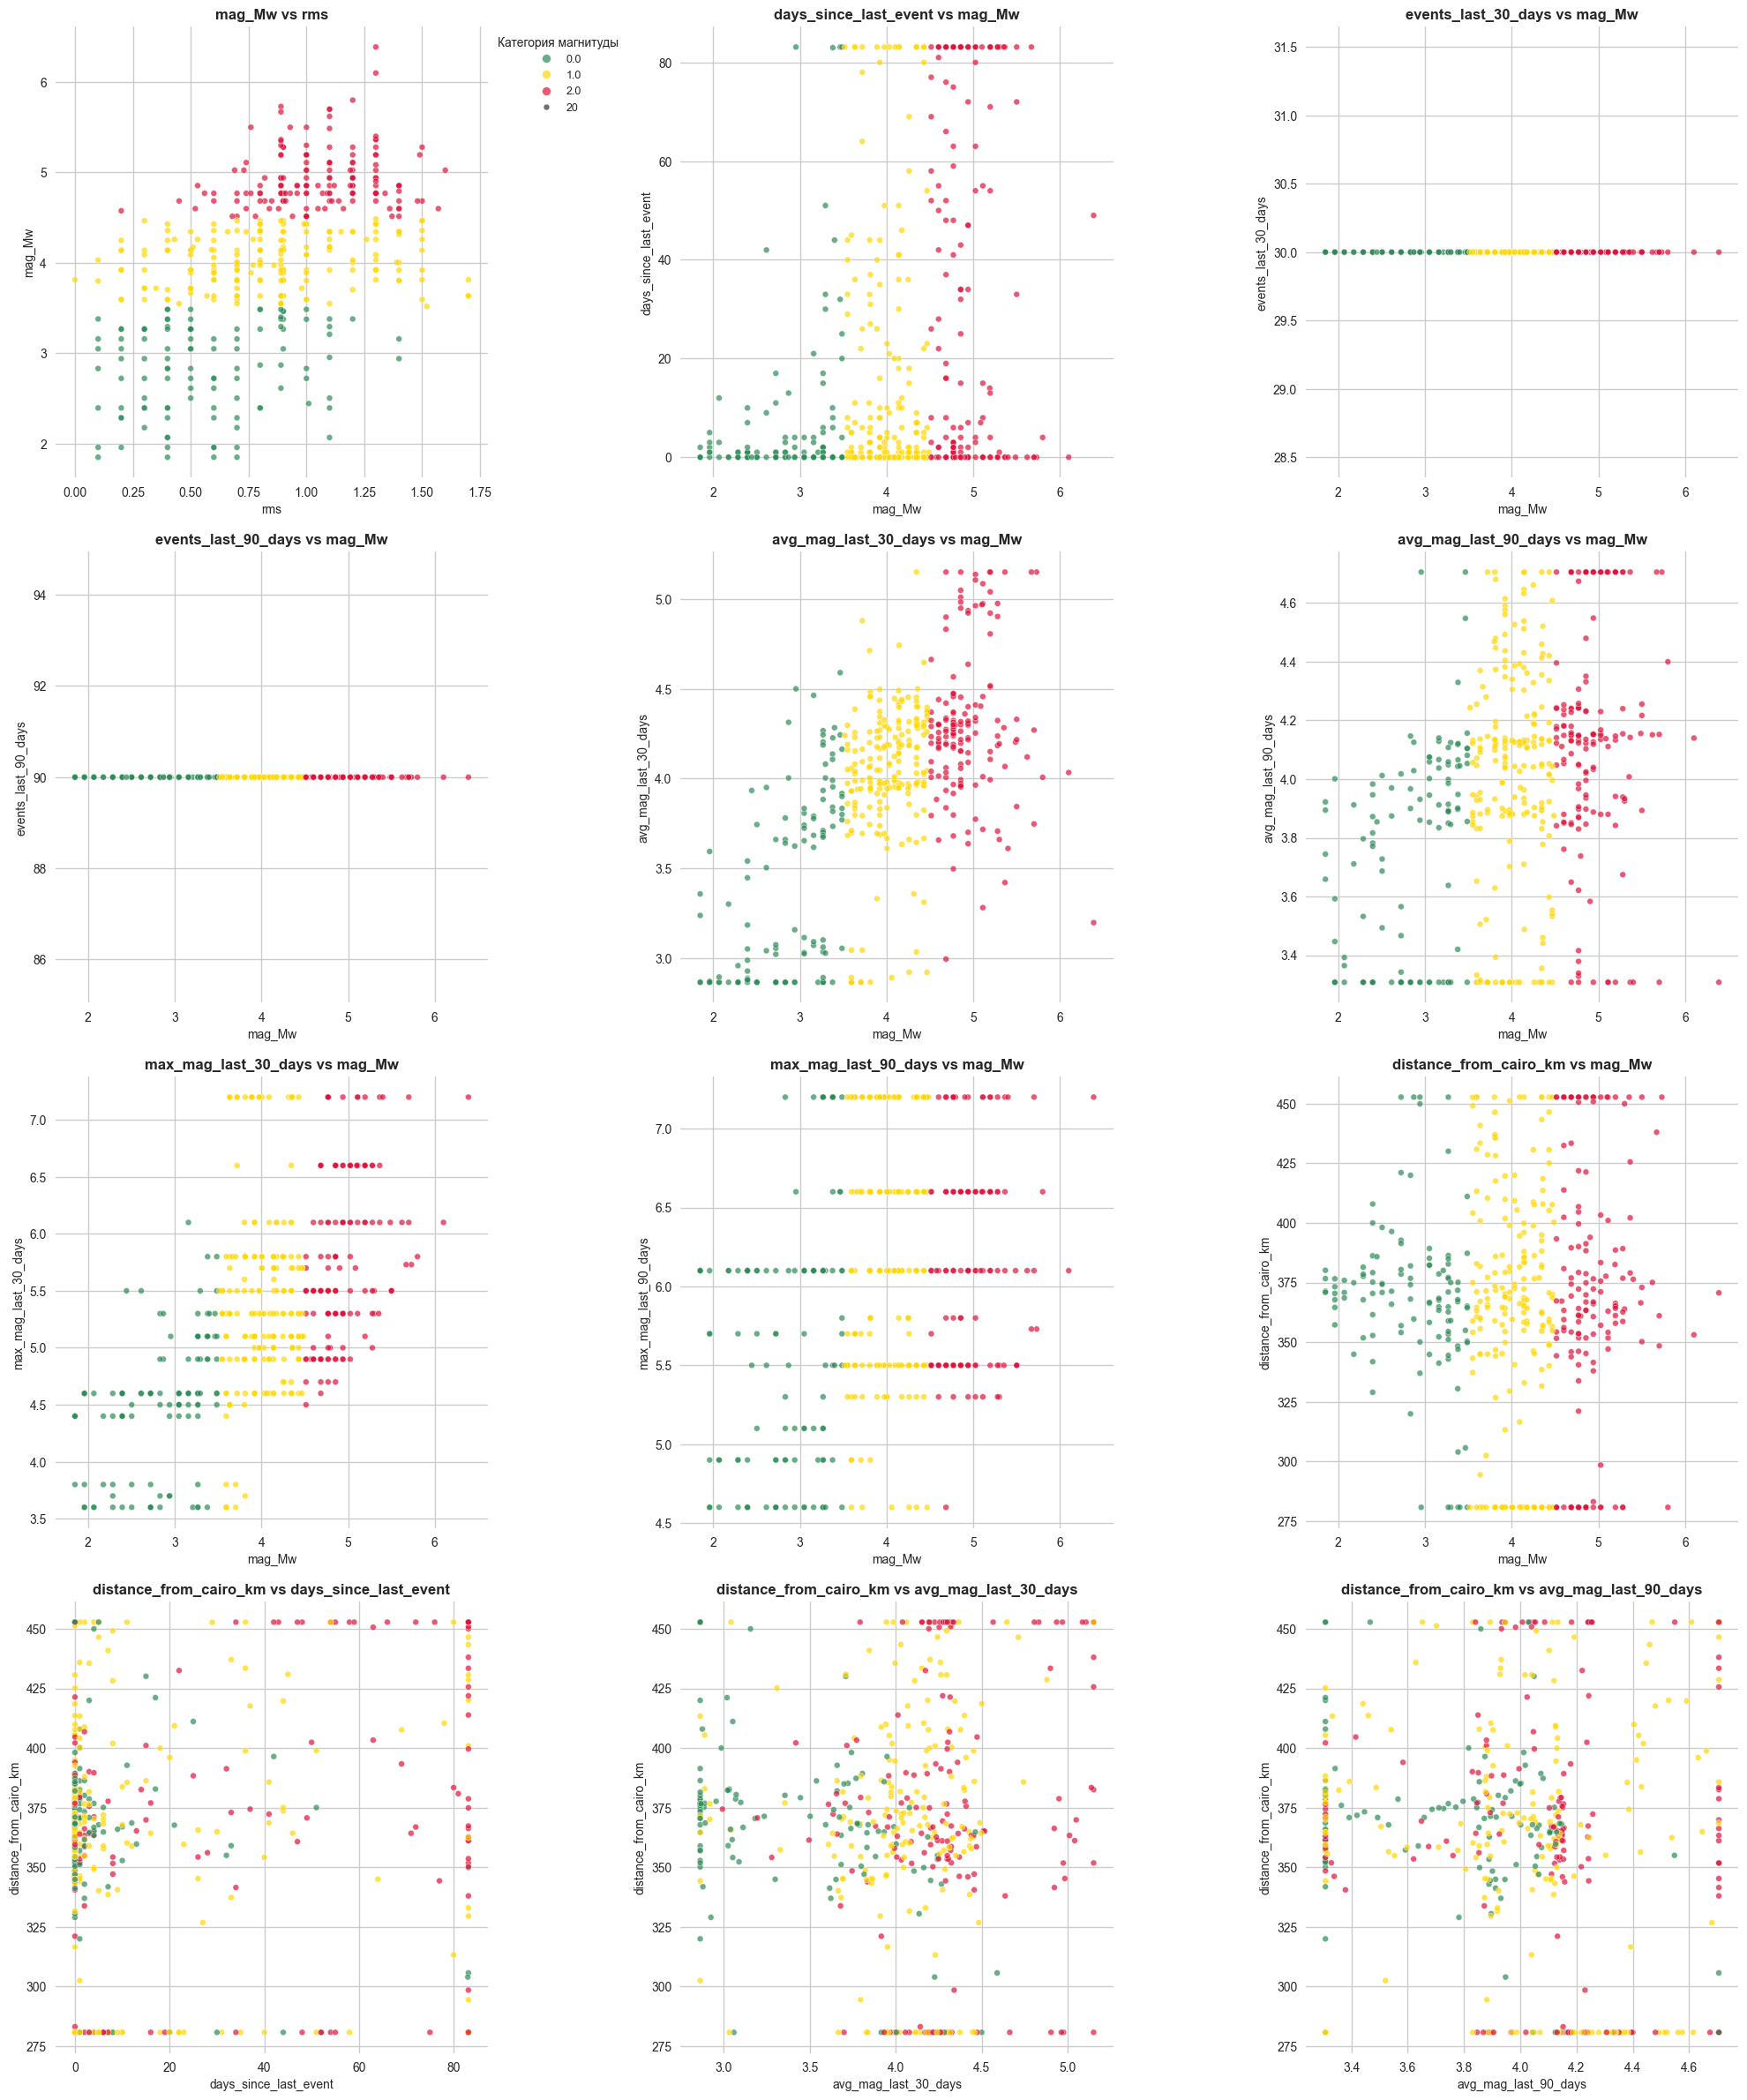

In [80]:
mag_palette = {
    0: '#2E8B57',  # LOw
    1: '#FFD700',  # Medium
    2: '#DC143C'   # High
}

numeric_columns = [
    'rms', 'mag_Mw', 
    'days_since_last_event', 'events_last_30_days', 'events_last_90_days',
    'avg_mag_last_30_days', 'avg_mag_last_90_days', 
    'max_mag_last_30_days', 'max_mag_last_90_days',
    'distance_from_cairo_km'
]


plt.style.use('seaborn-v0_8')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

feature_pairs = list(combinations(numeric_columns, 2))
useless_pairs = [('rms', 'days_since_last_event'), ('rms', 'events_last_30_days', ), ('rms', 'events_last_90_days'),
          ('rms', 'avg_mag_last_90_days'), ('rms', 'avg_mag_last_30_days'), ('rms', 'max_mag_last_90_days'),
          ('rms', 'max_mag_last_30_days'), ('rms', 'distance_from_cairo_km'),('days_since_last_event', 'events_last_30_days'),  ('days_since_last_event', 'events_last_90_days'),('days_since_last_event', 'avg_mag_last_30_days'), ('days_since_last_event', 'avg_mag_last_90_days'), ('days_since_last_event', 'max_mag_last_30_days'), ('days_since_last_event', 'max_mag_last_90_days'), ('events_last_30_days', 'events_last_90_days'),
          ('events_last_30_days', 'avg_mag_last_30_days'), ('events_last_30_days', 'avg_mag_last_90_days'), ('events_last_30_days', 'max_mag_last_30_days'), ('events_last_30_days', 'max_mag_last_90_days'),('events_last_30_days', 'distance_from_cairo_km'),
          ('events_last_90_days', 'avg_mag_last_30_days'), ('events_last_90_days', 'avg_mag_last_90_days'), ('events_last_90_days', 'max_mag_last_30_days'), ('events_last_90_days', 'max_mag_last_90_days'), ('events_last_90_days', 'distance_from_cairo_km'), ('avg_mag_last_30_days', 'avg_mag_last_90_days'), ('max_mag_last_30_days', 'max_mag_last_90_days'), ('max_mag_last_30_days', 'distance_from_cairo_km'), ('max_mag_last_90_days', 'distance_from_cairo_km'),
            ('avg_mag_last_90_days', 'max_mag_last_30_days'), ('avg_mag_last_90_days', 'max_mag_last_90_days'), ('avg_mag_last_30_days', 'max_mag_last_30_days'), ('avg_mag_last_30_days', 'max_mag_last_90_days')]

for i in useless_pairs:
    feature_pairs.remove(i)

n = len(feature_pairs)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))

axes = axes.flatten()
for i in range(n, len(axes)):
    fig.delaxes(axes[i])  

for i, (x_feat, y_feat) in enumerate(feature_pairs):
    sns.scatterplot(
        data=df, x=x_feat, y=y_feat, hue='mag_category_3classes',
        palette=mag_palette, alpha=0.7, s=50, ax=axes[i], size=20)
    
    axes[i].set_title(f'{y_feat} vs {x_feat}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(x_feat, fontsize=10)
    axes[i].set_ylabel(y_feat, fontsize=10)

    if i == 0:
        axes[i].legend(
            title='Категория магнитуды',
            title_fontsize=10,
            fontsize=9,
            loc='upper left',
            bbox_to_anchor=(1, 1)
        )
    else:
        axes[i].get_legend().remove()

plt.subplots_adjust(top=0.95)
plt.tight_layout()
plt.show()

sns.set(style="whitegrid", palette="coolwarm", font_scale=1.1)


### Анализ

На основе построенных scatter plots можно выделить следующие ярко выраженные кластеры и группы:

#### 1. days_since_last_event vs mag_Mw
- **Кластер слабой магнитуды**: mag_Mw <3.5, кол-во дней с посл. события преимущественно < 100 (преимущественно зеленые точки)
- **Кластер средней магнитуды**: mag_Mw 3.5-4.5, кол-во дней с посл. события преимущественно < 300 (преимущественно желтые точки)
- **Кластер сильной магнитуды**: mag_Mw >4.5, кол-во дней с посл. события преимущественно < 500 (преимущественно красные точки)

#### 2. mag_Mw vs rms
- **Группа легкого опр. местоположения**: mag_Mw <3.5, погрешность местоположения < 1 сек. (преимущественно зеленые точки)
- **Группа опр. местоположения сред. сложности**: mag_Mw 3.5-4.5, погрешность местоположения 0.5-1.5 сек. (преимущественно желтые точки)
- **Группа сложного опр. местоположения**: mag_Mw >4.5, погрешность местоположения > 0.75 сек. (преимущественно красные точки)


### **Применение метода K-means для разбиения на кластеры**

#### *K-means работает только с числовыми данными, поэтому мы выбираем соответствующие признаки*

In [81]:
X = df[numeric_columns].copy()

#### K-means чувствителен к масштабу данные, признаки с большим диапазоном значений могут доминировать в вычислении расстояний, поэтому необходимо масштабировать данные

In [82]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Также надо определить оптимальное количество кластеров, для этого воспользуемся методом локтя (Elbow Method) и анализом силуэтного коэффициента (Silhouette Score)

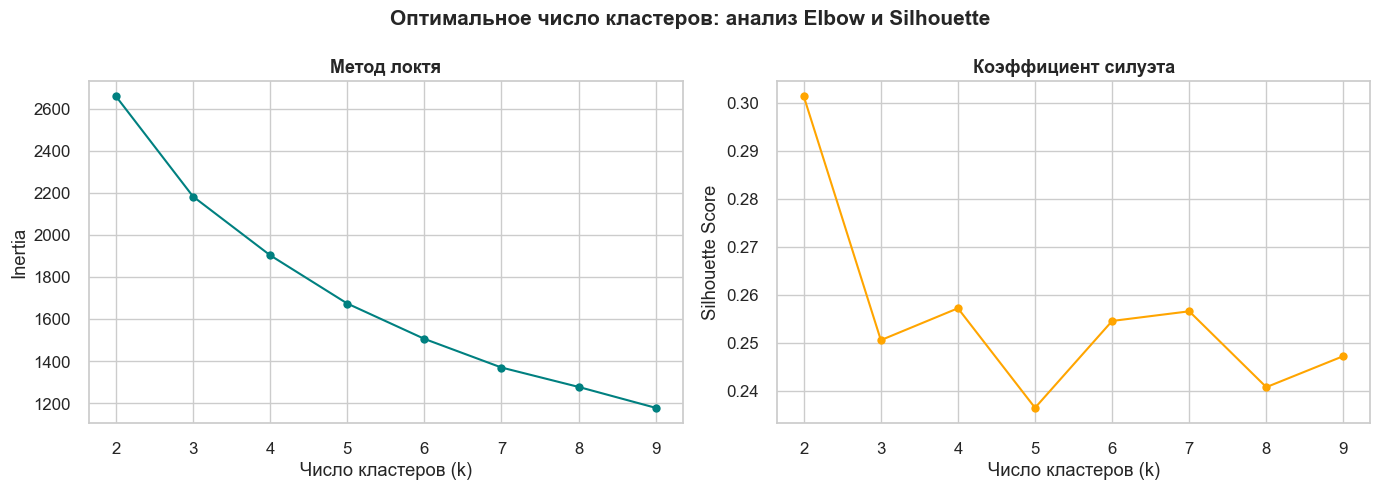

In [83]:
features = [
    'mag_Mw', 'avg_mag_last_30_days', 'avg_mag_last_90_days',
    'max_mag_last_30_days', 'max_mag_last_90_days',
    'days_since_last_event', 'depth', 'distance_from_cairo_km', 'rms'
]

X = df[features].dropna()
X_scaled = StandardScaler().fit_transform(X)

K = range(2, 10)

inertia = []
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Метод локтя
axes[0].plot(K, inertia, 'o-', color='teal')
axes[0].set_title('Метод локтя', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Число кластеров (k)')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Коэффициент силуэта
axes[1].plot(K, silhouette_scores, 'o-', color='orange')
axes[1].set_title('Коэффициент силуэта', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Число кластеров (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

plt.suptitle('Оптимальное число кластеров: анализ Elbow и Silhouette', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

#### Проанализировав графики, оптимальный k = 2
- На графике метода локтя видно, что график равномерно падает
- На графике анализа силуэтного коэффициента наибольший показатель при k = 2


Центры кластеров (в исходных значениях):
   mag_Mw  depth   rms  days_since_last_event  avg_mag_last_30_days  \
0    2.89   10.0  0.52                   4.10                  3.14   
1    4.35   10.0  0.94                  24.64                  4.18   

   avg_mag_last_90_days  max_mag_last_30_days  max_mag_last_90_days  \
0                  3.60                  4.30                  5.31   
1                  4.09                  5.57                  6.27   

   distance_from_cairo_km  
0                  375.42  
1                  361.89  


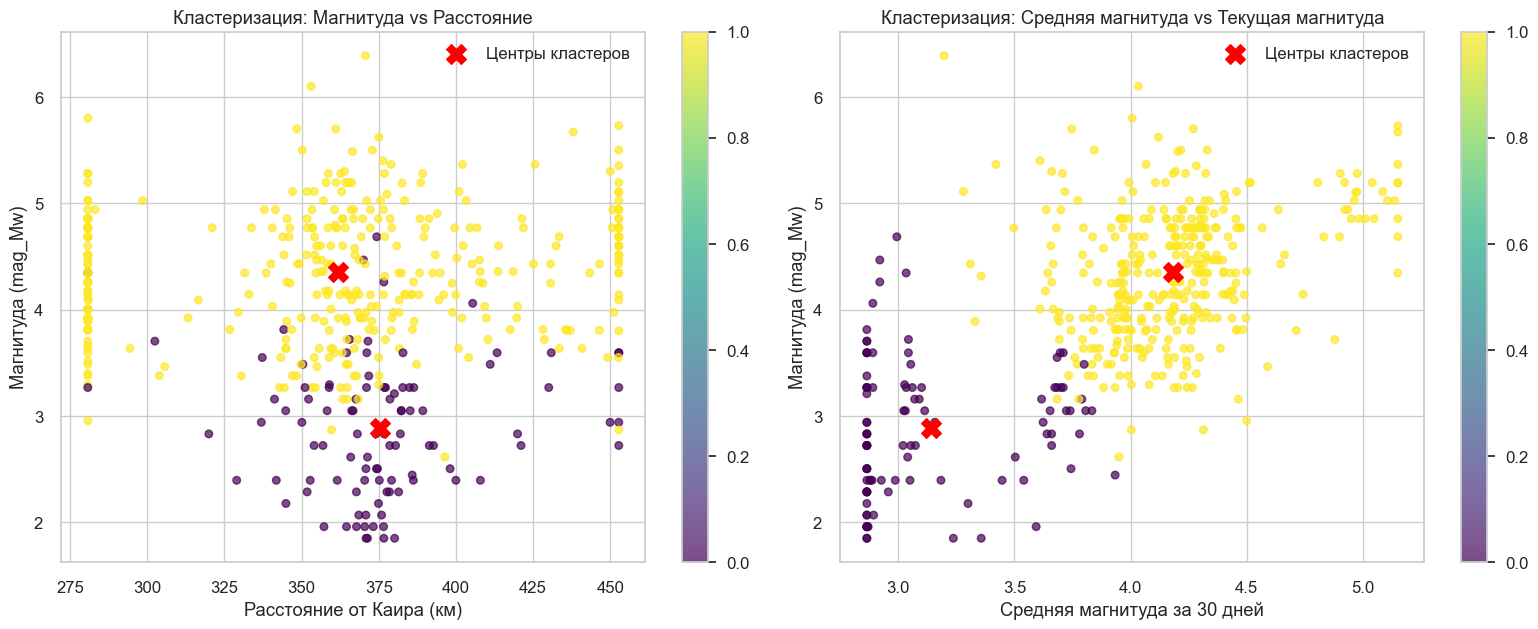


Средние значения признаков по кластерам:
         mag_Mw  depth   rms  days_since_last_event  avg_mag_last_30_days  \
Cluster                                                                     
0          2.89   10.0  0.52                   4.10                  3.14   
1          4.35   10.0  0.94                  24.64                  4.18   

         avg_mag_last_90_days  max_mag_last_30_days  max_mag_last_90_days  \
Cluster                                                                     
0                        3.60                  4.30                  5.31   
1                        4.09                  5.57                  6.27   

         distance_from_cairo_km  
Cluster                          
0                        375.42  
1                        361.89  


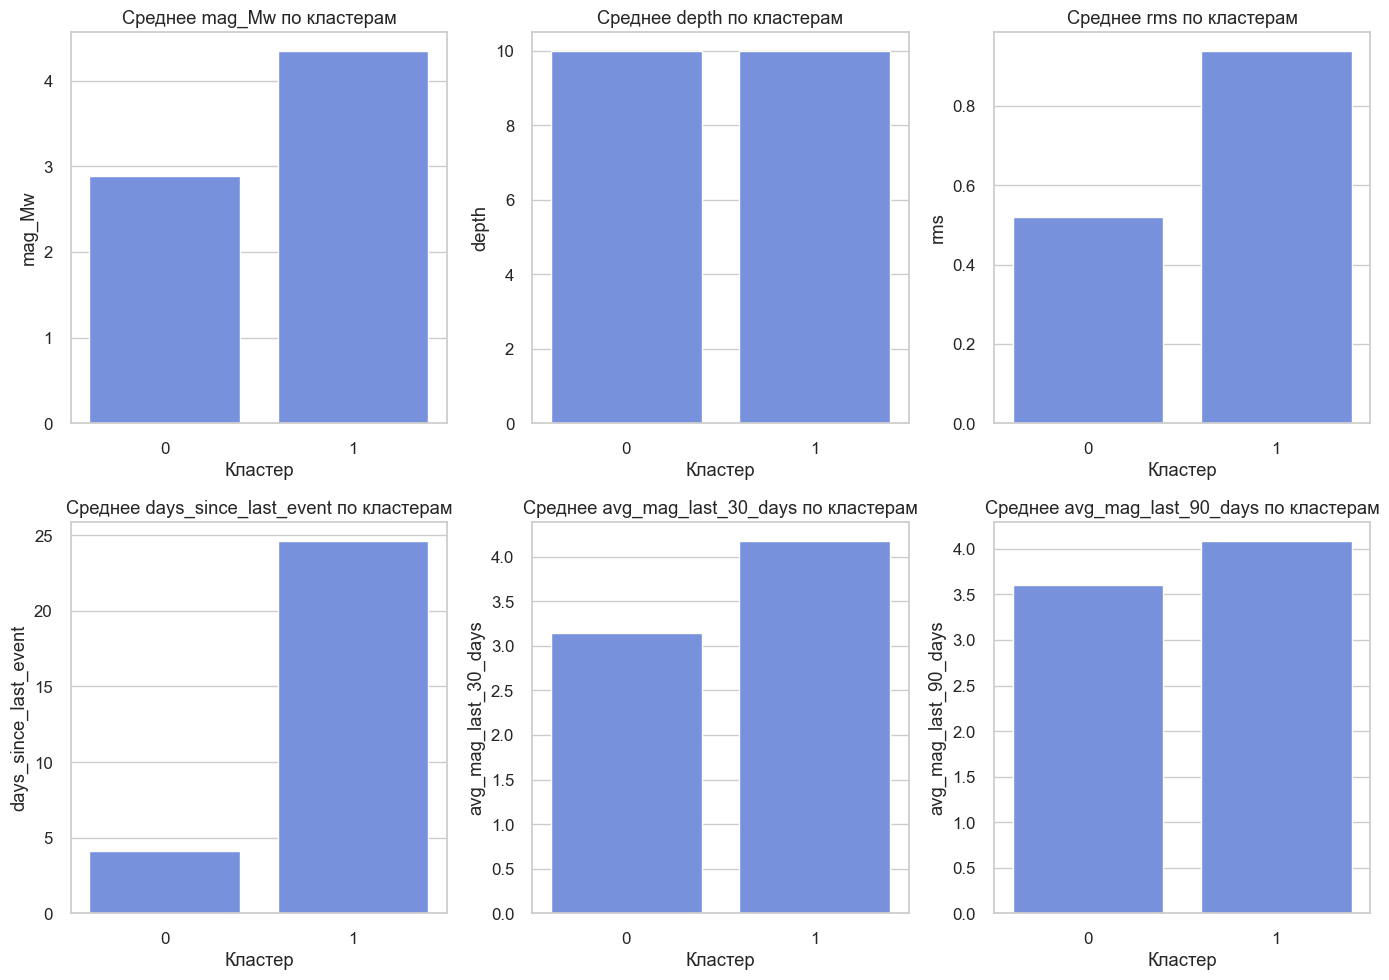

In [85]:
numeric_columns = [
    'mag_Mw', 'depth', 'rms', 'days_since_last_event', 
    'avg_mag_last_30_days', 'avg_mag_last_90_days', 
    'max_mag_last_30_days', 'max_mag_last_90_days', 
    'distance_from_cairo_km'
]

df_clean = df[numeric_columns].dropna().copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numeric_columns)

print("Центры кластеров (в исходных значениях):")
print(cluster_centers_df.round(2))

plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 3)
scatter = plt.scatter(df_clean['distance_from_cairo_km'], df_clean['mag_Mw'],
                      c=df_clean['Cluster'], cmap='viridis', alpha=0.7, s=30)
plt.scatter(cluster_centers_df['distance_from_cairo_km'], cluster_centers_df['mag_Mw'],
            c='red', marker='X', s=200, label='Центры кластеров')
plt.xlabel('Расстояние от Каира (км)')
plt.ylabel('Магнитуда (mag_Mw)')
plt.title('Кластеризация: Магнитуда vs Расстояние')
plt.legend()
plt.colorbar(scatter)

plt.subplot(2, 2, 4)
scatter = plt.scatter(df_clean['avg_mag_last_30_days'], df_clean['mag_Mw'],
                      c=df_clean['Cluster'], cmap='viridis', alpha=0.7, s=30)
plt.scatter(cluster_centers_df['avg_mag_last_30_days'], cluster_centers_df['mag_Mw'],
            c='red', marker='X', s=200, label='Центры кластеров')
plt.xlabel('Средняя магнитуда за 30 дней')
plt.ylabel('Магнитуда (mag_Mw)')
plt.title('Кластеризация: Средняя магнитуда vs Текущая магнитуда')
plt.legend()
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

cluster_stats = df_clean.groupby('Cluster')[numeric_columns].mean().round(2)
print("\nСредние значения признаков по кластерам:")
print(cluster_stats)

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_columns[:6], 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=cluster_stats.index, y=cluster_stats[feature])
    plt.title(f'Среднее {feature} по кластерам')
    plt.xlabel('Кластер')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## **Вывод**

В ходе проделанной работы с датасетом землетрясений были приобретены и применены важные навыки анализа данных: добавление нового информативного атрибута (Кол-во сейсмической энергии, log_seismic_energy) который позволил количественно оценить энергетическую составляющую сейсмических событий, тщательная предобработка данных — удаление дублей, выявление и обработка выбросов, а также визуальный анализ взаимосвязей между признаками с выявлением ярко выраженных групп и кластеров по уровням магнитуды.